# Теоретические основы глубокого машинного обучения

### Основы нейронных сетей
&emsp;Подразумевается, что в рамках предыдущих дисциплин вам уже рассказывали, что такое нейронные сети, поэтому здесь лишь кратко затронем этот вопрос. По существу, нейронная сеть - это набор слоев, состоящих из нейронов (см. рис. 1 - здесь шарики - нейроны, а столбцы этих шариков - слои).<br>
&emsp;Каждый нейрон принимает на вход данные и, в простейшем случае, умножает их на константы (веса), после чего складывает результаты произведения и применяет к ним какую-то функцию активации (в самом простом случае $f(x_S) = k \times x_S$,  где  $x_S=w_1 x_1 + w_2 x_2+...$ - сумма входных значений $x_i$, умноженных на веса $w_i$). Бывают и исключения, например, сверточные слои, о которых ниже, но в целом каждый нейрон нейросети применяет к переданным ему данным какую-то функцию и передает результат дальше.<br>
&emsp;Внутри слоя используют одинаковые функции активации, а между слоями они могут различаться. Все слои нейросети делят на три условных группы - входной слой (то, что непосредственно воспринимает входные данные), выходной слой (то, откуда снимается результат) и скрытые слои (все слои, что находятся между входным и выходным).<br>
&emsp;Функция, реализуемая отдельным нейроном, как правило, достаточно простая, но за счет использования в нейросетях большого числа простых нейронов можно решать этими сетями довольно сложные задачи.<br>

### Обучение нейросети
Для обучения нейронной сети ей на вход подают обучающую выборку данных. При самом простом методе обучения, с учителем, также нейросети после прохождения одной итерации обучения, даются верные ответы, которым соответствуют входные данные (например, входные данные - изображения разных объектов, выходные - номер класса, к которому относится объект на изображении). Нейросеть работает только с числовыми значениями. После прохода обучающих данных через нейросеть происходит корректировка ее весов, в чем и заключается обучение (подробнее ниже). Одно прохождение обучающих данных через нейросеть называют эпохой.

### Переобучение и недообучение
&emsp;Одна из главных проблем нейросетей - склонность к переобучению (overtraining, overfitting). Переобучение говорит о том, что вероятность ошибки обученного алгоритма на объектах тестовой выборки оказывается существенно выше, чем средняя ошибка на обучающей выборке.<br>
&emsp;В противоположность ей недообучение (underfitting) связано с тем, что алгоритм не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.<br>

### Обучающая, проверочная и тестовая выборки
&emsp;В машинном обучении принято разбивать датасет (набор данных) на 3 выборки: 
<ul><li>обучающая (train);</li> 
<li>проверочная (validation);</li> 
<li>тестовая (test).</li></ul>
&emsp;Проверочная подается на нейросеть после каждой эпохи, помогает оценить верность используемых параметров модели в процессе обучения, а также снизить переобучение. Тестовая подается после всех эпох обучения, для проверки точности обученной модели.<br>
&emsp;Когда вместо трех используется две выборки (например, если образцов данных не слишком много), роли тестовой и проверочной выборок совпадают - проверить точность на данных, не использованных при обучении. Поэтому иногда в пособиях и инструкциях понятия проверочной и тестовой выборок не различают.<br>

### Глубокие нейронные сети и глубокое обучение
&emsp;Глубокими нейронными сетями называют такие нейросети, которые способны сами формировать "представления" о данных, то есть выделять в них некоторые закономерности. Неглубокие этого не могут, их можно представить как сложное уравнение, но не более - в таком уравнении никаких представлений не будет. Структурно глубокими, как правило, считают нейросети с несколькими нелинейными скрытыми слоями.<br><br>
![alt text](image-5.png)<br>
Рис. 1 - Сравнение глубокой и неглубокой нейросетей<br><br>
&emsp;Соответственно глубоким обучением называют обучение глубоких нейронных сетей.<br>

### Свертка
&emsp;Один из самых распространенных типов глубоких нейросетей - сверточные. Как вы можете помнить из предшествующих дисциплин, в них осуществляется свертка исходного изображения с ядром свертки. В этом смысле изображение представляется как набор чисел, задающих яркость каждого пиксела (изображение = матрица), если избражение цветное, то оно состоит из 3 матриц (каждая на один из 3 цветов RGB). Ядро свертки - тоже матрица, но, как правило, меньшего размера. Это ядро сдвигается вдоль исходного изображения, числовые значения яркостей пикселов изображения, пересекающихся с числовыми значениями ядра при данном его положении, умножаются друг на друга, так происходит со всеми пересекающимися значениями. Все результаты умножений складываются и формируется числовое значение пиксела нового изображения (его координаты соответствуют текущему положению ядра свертки).<br><br> 
![alt text](2D_Convolution_Animation.gif)<br>
Рис. 2 - Свертка матриц<br><br>

### Padding при свертке
&emsp;Проблема свертки в том, что ядро, для большинства случаев, должно иметь размер больше 1, тем самым будут появляться ситуации, при которых ядро должно "вылезти" за границы исходного изображения, чтобы получить свертку с всеми его пикселами. Но за пределами изображения нет числовых значений, из-за чего, без дополнительных мер, размер нового изображения, с иходным размером $W \times H$ после свертки с ядром $k \times k$ будет $W-k+1 \times H-k+1$.<br>
&emsp;Для предотвращения этого эффекта (если необходимо) используют padding - добавление нулей вокруг исходного изображения. Размер padding, для сохранения исходного размера изображения после свертки с ядром $k \times k$, должен составлять $\dfrac{k-1}{2}$ для ядер нечетного размера (такие и следует использовать, чтобы позиционировать ядро центральным пикселом при сдвиге).<br><br>
![alt text](1_O06nY1U7zoP4vE5AZEnxKA.gif)<br>
Рис. 3 - Padding<br><br>

### Stride при свертке
&emsp;Другой параметр при свертке - stride (шаг сдвига ядра). По умолчанию задают его равным 1 и ядро свертки каждый шаг сдвигается на один пиксел от предыдущего положения. для ускорения вычислений или снижения размерности можно задать stride больше 1, тогда ядро будет сдвигаться больше, чем на 1 шаг. При этом можно задавать stride раздельно для сдвига по высоте и по ширине. На рис. 4 задан stride по высоте 3 и по ширине 2.<br><br>
![alt text](image-1.png)<br>
Рис. 4 - Stride<br><br>

### Функция ошибок
&emsp;При обучении одним из центральных понятий является функция ошибок - именно она позволяет обучиться модели. Фукнция ошибок (или целевая функция) - некоторая зависимость между параметрами модели (в случае с нейросетью - весов нейронов) от значения ошибки (числа неверно предсказанных ответов). После каждой итерации обучения вычисляется функция ошибки, по антиградиенту которой (направление убывания этой функции, вычисленное через частные производные по всем весам нейросети) определяются небольшие смещения (по каждому из весов), которые нужно вычесть из текущих занчений весов.<br>
&emsp;После создания модели веса в нейронах задаются случайными значениями, при обучении же они все больше подстраиваются под обучающие данные таким образом, чтобы решать поставленную задачу, например, распознавать изображения. В случае со сверточными слоями весами являются числовые значения в ядрах свертки, в случае с полносвязными - константы, на котрые умножаются входные числа (см. математическую модель полносвязного нейрона на рис. 5, здесь веса это $w_i$ и смещение $w_0$).<br><br>
![alt text](image-4.png)<br>
Рис. 5 - Математическая модель полносвязного нейрона<br><br>
&emsp;Описанный метод корректировки весов называют методом обратного распространения ошибки, поскольку ошибка как бы запускается с выхода нейросети (корректировка начинается с последних весов) и нейросеть работает наоборот.<br>
&emsp;Сам поиск направления антиградиента функции ошибок имеет существенные проблемы. Традиционно для его нахождения используетя метод градиентного спуска (на каждом этапе определяется направление наибольшего уменьшения градиента), но этот метод работает не всегда быстро и часто "застревает" в локальных минимумах. Чтобы снизить вероятность проблем, применяют оптимизаторы - надстройки над методом градиентного спуска. Самый популярный до сих пор метод стохастического градиентного спуска на каждом этапе выбирает не направление наибольшего уменьшения градиента, а немного смещенное на случайное (стохастическое) значение. Наиболее же продвинутым оптимизатором на момент 2024 г. считают AdamW, он работает по более сложной логике.<br>


# Азы pytorch

&emsp;Pytorch - опенсорсный фреймворк для машинного обучения, в том числе для построения нейронных сетей. Состоит из трех библиотек:<br>
<ul>
<li>pytorch - основная библиотека, общий набор методов, функций и т.п. для машинного обучения;</li>
<li>torchvision - методы для базовой обработки изображений и видео, наборы датасетов и моделей компьютерного зрения;</li>
<li>torchaudio - методы обработки, датасеты и модели для аудио.</li>
</ul>
&emsp;Установим все модули данного набора.

In [ ]:
pip install torch torchaudio torchvision

&emsp;Центральное понятие pytorch, как и tensorflow - тензоры. Тензор - это многомерный массив. Так, например, вектор является одномерным тензором, матрица - двухмерным, изображение - трехмерным (две размерности задают положение пиксела в изображении, третье измерение - вектор цветов RGB или другой цветовой системы) и т.д. По существу машинное обучение во многом сводится к операциям над тензорами (сложение, умножение и др. - их великое множество). Несмотря на то, что код pytorch запускается через python, сами операции над тензорами компилируются в C++ для более оптимального выполнения на CPU/GPU.<br>
Начнем с импорта модуля pythorch.

In [2]:
import torch

&emsp;Создадим двухменый тензор из 5 строк по 3 элемента в каждой. Метод zeros позволяет создать произвольного размера тензор, заполненый нулями. Как видим, тип числовых значений в тензоре float32. 

In [ ]:
tensor_zeros = torch.zeros(5, 3)
print(tensor_zeros)
print(tensor_zeros.dtype)

&emsp;Размеры каждого из измерения ("стороны" тензора) задаются через запятую, ниже, например, задан тензор 4x4x3 (такой тензор можно было бы вывести как черное изображение размером 4x4).

In [ ]:
torch.zeros(4, 4, 3)

&emsp;Но для изображений тип данных float32 излишен, можно вручную задать тип значений аргументом dtype. Зададим тензор, аналогичный тому, что представлен выше, но сменим тип данных на int16 (-32768...32767).

In [ ]:
tensor_ones = torch.ones((4, 4, 3), dtype=torch.int16)
print(tensor_ones)

&emsp;Метод rand класса torch аналогичен zeros и ones того же класса, но инициализируется случайными значениями (float32) от 0 до 1. Если необходимо в разных местах кода сгенерировать случайные, но одинаковые тензоры - перед строкой с генеацией нужно вызвать метод manual_seed с одинаковым числом в качестве аргумента.

In [ ]:
torch.manual_seed(42)
r1 = torch.rand(2, 2)
print('Случайный тензор 2х2')
print(r1)

r2 = torch.rand(2, 2)
print('Другой случайный тензор:')
print(r2)

torch.manual_seed(42)
r3 = torch.rand(2, 2)
print('Должен совпадать с первым:')
print(r3)

&emsp;Ниже пример простых математических операций над тензорами.

In [ ]:
ones = torch.rand(2, 2, 3)
print('Первый:')
print(ones)

twos = torch.rand(2, 2, 3) * 2 # умножение всех элементов на константу 2
print('Второй:')
print(twos)

threes = ones + twos       # сложение допускается для тензоров однаковой размерности
print('Сумма тензоров:')
print(threes)              # выведется поэлементное сложение тензоров
print(threes.shape)        # размерность нового тензора совпадает с исходными

&emsp;К тензорам можно применять и другие операции - как поэлементные, так и из линейной алгебры (как при работе с матрицами).

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2 # зададим матрицу (тензор 2х2) со случайными значениями от -1 до 1
print('Случайная матрица, r:')
print(r)

# Общие математические операции применимы к тензорам поэлементно:
print('\nМодуль элементов r:')
print(torch.abs(r))

# Тригонометрические функции:
print('\nАрксинус элементов r:')
print(torch.asin(r))

# Элементы линейной алгебры:
print('\nОпределитель r:')
print(torch.det(r))
print('\nСингулярное разложение r:')
print(torch.svd(r))

# Статистические функции:
print('\nСреднее и СКО в r:')
print(torch.std_mean(r))
print('\nНаибольшее в r:')
print(torch.max(r))

# Создание модели pytorch

&emsp;Рассмотрим создание простой нейросетевой модели с помощью pytorch. Для начала импортируем основной модуль torch для доступа к его методам, а также torch.nn и torch.nn.functional по отдельности. nn содержит все, что касается нейронных сетей, а functional - функции активации нейронов.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### LeNet
&emsp;Попробуем повторить одну из простых моделей глубокого обучения - нейронную сеть LeNET. Это очень старая модель, первая версия которой вышла в 1989 г., а последняя в 1998. Она применялась для распознавания рукописных цифр от 0 до 9, изображения которых представлены в размерности 28x28x1 (ширина и высота 28 пикселов, 1 канал цвета, монохромный). <br><br>
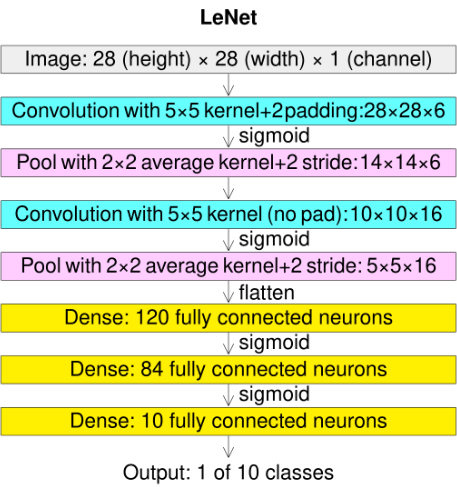<br>
Рис. 6 - Структура LeNet5<br><br>
&emsp;Модель состоит из 7 слоев - 2 сверточных, 2 подвыборки и 3 полносвязных. Сверточные слои осуществляют выявление признаков в изображении путем применения свертки. В сверточных слоях нейроны представляют собой подобие изображений. Те нейроны, которые более похожи на исходное изображение, имеют большую "яркость" пикселей (большие числовые значения в нейроне). <br>
&emsp;Первый сверточный слой C1 выделяет более мелкие черты (так как обрабатывает изображение в полном разрешении), второй C3 - более грубые (так как пулинг-слой S2 после первого сверточного снижает размер изображения в 2 раза, из-за чего мелкие детали теряются и можно выделять более общие). Функция активации в оригинале - сигмоида, но можно их заменить на другую, например, relu. <br>
&emsp;Второй пулинг-слой S4 снижает размерность данных после второго сверточного слоя, чтобы последующим "обычным", несверточным слоям (F5-F7) было проще обрабатывать выделенные признаки (ведь при классификации изображений нам важно скорее, в каком из сверточных нейронов были большие числовые значения, чем конкретный вид этих изображений, поскольку, условно, нейрон с большими числовыми значениями сильнее обучен на признаки одного из классов исходных изображений - в данном примере на признаки одной из 10 рукописных цифр). <br>
&emsp;Затем происходит "сплющивание" данных - преобразование flatten-слоем выходов пулинг-слоя из двухмерного вида (подобия изображения) в одномерный (в последовательность чисел, полученную из "слепленных" строк двухмерного массива на выходе пулинг-слоя). Далее осуществляется классификация "обычными" полносвязными dense-слоями F5-F7 (функции активации в оригинале - сигмоида, но можно их заменить на другие, например, relu). <br> 
&emsp;Последний слой содержит 10 нейронов без функции активации - просто ставят столько нейронов, сколько должно быть классов и "собирают" ими данные с предыдущих слоев, у какого нейрона окажется большее значение - тот класс и предсказывается (в даном примере номер цифры от 0 до 9). Так происходит в правильно обученной модели, до обучения, конечно же, нейросеть будет предсказывать случайные значения. <br><br>
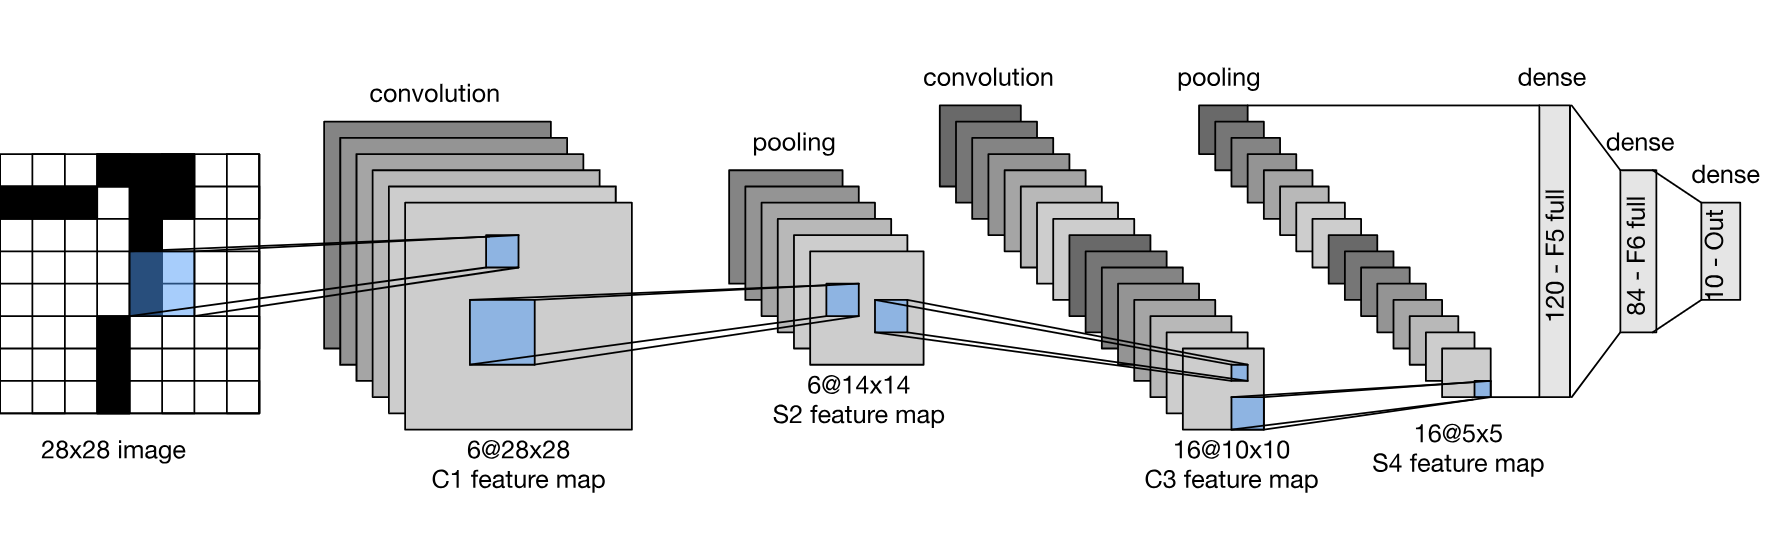<br>
Рис. 7 - Детализированная структура LeNet5


&emsp;Повторим такую структуру нейросети на pytorch. В данном фреймворке модель создается в виде класса, наследника базового класса ```nn.Module ```из библиотеки pytorch, именно он содержит базовые параметры нейросетей. Структура модели указывается в методе ```__init__```.<br>
&emsp;Первой строкой в нем должна быть ```super().__init__()``` Для верной инициализации всех параметров согласно высшему в иерархии классу (берутся значения по умолчанию из nn.Module).<br>
&emsp;Далее определяются сами слои - ```Conv2d```, ```MaxPool2d``` и ```Linear``` - соответственно сверточный (2d для двухмерного ядра свертки), пулинг-слой (max указывает на то, что при снижении размерности берется наибольшее значение из соседних, а, например, в ```AvgPool2d``` берется среднее), полносвязный слой (```Linear``` говорит об афинном линейном преобразовании, то есть о применении какой-то функции к входным данным).<br>
&emsp;Обратите внимание, что число нейронов слоя - это параметр ```out_channels```. В курсовой вам нужно будет менять этот параметр. Для правильной работы нейросети необходимо, чтобы число входов слоя ```in_channels``` совпадало с числом нейронов ```out_channels``` предыдущего слоя.<br>
&emsp;Также важным здесь является строка ```x.view...```. Она преобразует данные из многомерного вида в одномерный вектор, поскольку полносвязные слои F5-F7 не могут воспринимать многомерные тензоры, только вектора. Поэтому данная строка кода "разворачивает" поданный на него многомерный тензор по строкам в один длинный вектор. Этой строке на рис. 6 соответствует процедура flatten.<br>
``` python
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        # первый сверточный слой C1, 1 канал цвета ч/б, 6 нейронов (каналов на выходе),
        # размер ядра свертки 5х5, padding=2 позволяет сохранить размер изображения
        # после свертки 
        self.C1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        # первый пулинг-слой S2, размер ядра = снижение размерности
        # stride - шаг, здесь 2, то есть ядро каждый раз сдвигается на 2 пиксела
        self.S2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # второй сверточный слой C3
        self.C3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # второй пулинг-слой S4, не меняет число каналов 16, но сокращает размер
        self.S4 = nn.MaxPool2d(kernel_size=2, stride=2)
        # первый полносвязный слой F5, число входов нейронов 16 * 5 * 5
        # соответствует размеру тензора после S4 - 16 каналов на выходе
        # (определяется слоем C3, S4 не меняет это число), и из-за
        # снижения размерности оставшиеся "грани" тензора 5х5 (см. рис. 6)
        self.F5 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        # второй полносвязный слой F6
        self.F6 = nn.Linear(in_features=120, out_features=84)
        # третий полносвязный слой F7
        self.F7 = nn.Linear(in_features=84, out_features=10)
```
&emsp;Но никаких преобразований при инициализации объекта класса LeNet5 не произойдет - метод ```__init__``` лишь задает слои. Для возможности обучения нейросети в ней задается метод ```forward``` (в отличии от Tensorflow, где задание слоев означает создание конвейера, который последовательно обрабатывает входные данные).
``` python
    def forward(self, x):
        # в pytorch обрабатываемые данные должны быть float, тогда как
        # в изображениях, как правило, используют целые числа для задания
        # яркостей. Чтобы избежать проблем, сперва преобразуем тензор
        # входных данных x в float стандартным методом pytorch
        x = x.float()
        # применяем свертку слоем C1 с функцией активации relu
        x = F.relu(self.C1(x))
        # применяем первый пулинг-слой S2, он не содержит функции активации,
        # поэтому вызвается как свойство объекта класа self
        x = self.S2(x)
        # применяем свертку слоем C3 с функцией активации relu
        x = F.relu(self.C3(x))
        # применяем второй пулинг-слой S4
        x = self.S4(x)
        # метод view меняет размер тензора на указанный
        # -1, N означает, что первая размерность должна быть
        # рассчитана автоматически так, чтобы вторая составила N
        # в данном примере получится 1x400 (16*5*5=400), 
        # а если указать, например, -1,100, то получим 4x100,
        # то есть общее число элементов из входного тензора
        # должно сохраняться
        x = x.view(-1, 16 * 5 * 5)
        # применяем первый полносвязный слой F5 с функцией активации relu
        x = F.relu(self.F5(x))
        # применяем второй полносвязный слой F6 с функцией активации relu
        x = F.relu(self.F6(x))
        # применяем последний полносвязный слой F7 без функции активации
        x = self.F7(x)
        # возвращаем результат обработки
        return x
```

&emsp;Комбинируем полученный код в один класс.

In [50]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.C1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.S2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.C3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.S4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.F5 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.F6 = nn.Linear(in_features=120, out_features=84)
        self.F7 = nn.Linear(in_features=84, out_features=10)
    def forward(self, x):
        x = x.float()
        x = F.relu(self.C1(x))
        x = self.S2(x)
        x = F.relu(self.C3(x))
        x = self.S4(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.F5(x))
        x = F.relu(self.F6(x))
        x = self.F7(x)
        return x

&emsp;Создадим тензор, имитирующий ч/б изображение 28x28. Метод ```randint``` генерирует тензор размером, который указан в виде tuple последним аргументом, причем каждое числовое значение в тензоре меняется от ```min``` до ```max-1```, где ```min``` - первый аргумент, ```max``` - второй аргумент. Здесь зададим "изображение" с возможными значениями 0 или 1, как и изображения, на которых обучали оригинальную LeNet.

In [ ]:
in_img = torch.randint(0,2,(1,28,28))
in_img

&emsp;С помощью метода ```ToPILImage()``` можно преобразовать тензор в изображение PIL (стандартная библиотека python для работы с изображениями) и вывести полученное изображение (важно не забыть преобразовать методом ```float``` тензор во float, так как метод не работает с int).

In [ ]:
import torchvision
trans = torchvision.transforms.ToPILImage()
img_tensor = trans(in_img.float())
img_tensor

&emsp;Создадим объект класса LeNet5 и применим его к "изображению". Получим 10 значений на выходе (по числу выходных нейронов).

In [ ]:
net = LeNet5()
output = net(in_img)
output

&emsp;Чтобы не сравнивать по величине значения на выходе нейросети вручную воспользуемся методом ```argmax```, он выведет номер наибольшего значения среди всех полученных (= номер предсказанного класса).

In [ ]:
torch.argmax(output)

# Загрузка данных и создание датасета

&emsp;Для обучения модели нужны данные, загрузим стандартный набор данных (датасет) CIFAR, содержащий цветные изображения 32х32 для 10 классов: 6 для животных и 4 для различных видов транспорта.<br>
<br><br>
![alt text](image-2.png)<br>
Рис. 7 - Пример изображений CIFAR10<br><br>
&emsp;Сперва импортируем необходимые модули и библиотеки.

In [70]:
import torch
import torchvision
import torchvision.transforms as transforms

&emsp;При загрузке стандартных датасетов можно применять к ним преобразования различного вида. Метод ```transforms.compose``` из ```torchvision``` позволяет создать конвейер из нескольких преобразований, которые будут применяться к загружаемым изображениям последоваельно.<br>
&emsp;Метод ```ToTensor``` преобразует изображения в тензор, а ```Normalize``` - осуществляет нормализацию, приведение числовых значений яркости пикселов к одному диапазону (с теми аргументами, которые указаны сейчас, ```Normalize``` даст среднее значение 0 и СКО 0.5 в новых данных).

In [71]:
transform_input = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

&emsp;Метод ```torchvision.datasets.CIFAR10``` дает возможность загрузить датасет CIFAR10 (в модуле datasets присутствуют и другие датасеты). Аргумент ```root``` указывает путь, по которому (относительно расположения текущего файла) будут загружены изображения датасета, ```train=True``` указывает, что в переменную ```trainset``` будут записана только обучающая выборка из всего датасета (в CIFAR10 50000 обучающих изображений и 10000 тестовых). На каждый класс в датасете приходится по 6000 изображений. ```download=True``` указывает на необходимость скачивания датасета (если уже был скачан - даже при ```download=True``` повторной загрузки не произойдет). Аргумент ```transform``` указывает на переменную, содержащую применяемые к датасету после загрузки преобразования.

In [ ]:
trainset = torchvision.datasets.CIFAR10 (root='./data', train=True,
                                        download=True, transform=transform_input)

&emsp;После загрузки файлов датасета необходимо инициализировать из, загрузить в память. В терминах pytorch это означает создать загрузчик данных, здесь он записывается в переменную ```trainloader```. Используемый для загрузки подкласс ```torch.utils.data.DataLoader``` позволяет загрузить датасет в память, он принимает в качестве аргументов переменную с загруженным датасетом (```trainset```), размер батча ```batch_size``` (число образцов данных, после которого при обучении будут корректироваться веса нейросети), параметр перемешивания ```shuffle``` (для лучшего обучения данные стоит перемешать), а также число потоков при загрузке данных ```num_workers``` (не стоит указывать его большим числом, чем число ядер вашего процессора).

In [76]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

&emsp;Можно вывести изображения из загруженного датасета, для чего их необходимо денормализовать (вернуть исходные значения) и поменять местами стороны (транспонировать, получив из тензора изображение), что осуществляет заданная здесь функция ```imshow```.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# имена классов
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#функция вывода изображений, преобразованных в тензоры
def imshow(img):
    img = img / 2 + 0.5                        # денормализация
    npimg = img.numpy()                        # из тензора в numpy массив
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # и уже numpy массив можно транспонировать и вывести как изображение

# создаем итератор (массив) стадартным методом iter,
# в нем содержатся изображения и номера классов,
# которые выгружаем в images и labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

#выводим имена классов изображений
for j in range(4): print(f'{j+1}: {classes[labels[j]]}')
# выводим сами изображения в виде строки (grid)
imshow(torchvision.utils.make_grid(images))

# Обучение модели pytorch, ее сохрание/загрузку и использование для распозанвания

&emsp;Попробуем скомбинировать полученные знания для обучения модели. Сперва импортируем нужные библиотеки и модули.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import urllib
import PIL
import io

&emsp;Вновь зададим блок преобразования изображений датасета в тензоры с последующей нормализацией. Обратите внимание: здесь добавилось одно преобразование (строка 2) - Resize. Дело в том, что размер изображений CIFAR10 32x32, тогда как LeNet5 пригодна лишь для изображений 28x28. Подавая изображения произвольного размера получим ошибку при обучении, поэтому при загрузке датасета будем снижать размер изображений до 28x28.

In [35]:
transform_input = transforms.Compose(
    [transforms.Resize((28,28)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

&emsp;Подготовим обучающую выборку датасета. Поскольку файлы уже загружены, выведется сообщение о наличии файлов.

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_input)

&emsp;Аналогично подготовим тестовую выборку для проверки точности на ней.

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_input)

&emsp;Зададим загрузчики данных обучающей (```trainloader```) и тестовой (```testloader```) выборок. Для проверочной выборки ```shuffle = False```, поскольку при проверке точности перемешивание данных не имеет значения.

In [66]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

&emsp;Зададим имена классов, а также повторим код для вывода первых 4 изображений из обучающей выборки.

In [ ]:
classes = ['Самолет', 'Легковой автомобиль', 'Птица', 'Кот',
           'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовой автомобиль']
def imshow(img):
    img = img / 2 + 0.5                        # денормализация
    npimg = img.numpy()                        # из тензора в numpy массив
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # и уже numpy массив можно транспонировать и вывести как изображение
dataiter = iter(trainloader)
images, labels = next(dataiter)
for j in range(4): print(f'{j+1}: {classes[labels[j]]}')
imshow(torchvision.utils.make_grid(images))

&emsp;Повторим задание структуры нейросети LeNet5, но сменим число каналов входного сверточного слоя с 1 на 3, чтобы иметь возможность принимать на вход цветные изображения.

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.C1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=2)
        self.S2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.C3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.S4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.F5 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.F6 = nn.Linear(in_features=120, out_features=84)
        self.F7 = nn.Linear(in_features=84, out_features=10)
    def forward(self, x):
        x = x.float()
        x = F.relu(self.C1(x))
        x = self.S2(x)
        x = F.relu(self.C3(x))
        x = self.S4(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.F5(x))
        x = F.relu(self.F6(x))
        x = self.F7(x)
        return x

&emsp;Создадим объект класса ```LeNet5```, чтобы обучить нейросеть.

In [56]:
net = LeNet5()

&emsp;Чтобы посмотреть струкутру нейросети (заданные слои) можно воспользоваться методом ```eval```.

In [ ]:
net.eval()

&emsp;Теперь нужно создать функцию ошибок - именно она будет позволять обучиться модели. Для обучения моделей, выполняющих классификацию, чаще всего достаточно использовать функцию кросс-энтропии (```nn.CrossEntropyLoss```).

In [9]:
criterion = nn.CrossEntropyLoss()

&emsp;Также зададим оптимизатор AdamW для лучшего обучения нейросети. Здесь используется 3 аргумента: ```params``` - содержит ссылку на параметры объекта созданной модели нейросети, ```lr``` - learning rate, темп обучения, задает шаг смещения к минимуму функции ошибок оптимизатором на каждой итерации обучения, ```weight_decay``` - вводимая для предотвращения переобучения (регуляризации) поправка.

In [10]:
optimizer = optim.AdamW(params=net.parameters(), lr=1e-3, weight_decay=1e-2)

&emsp;Обучение происходит по эпохам. В pytorch цикл обучения задается вручную. Здесь, для удобства, количество эпох задается в первой строке.

In [ ]:
epochs = 2
for epoch in range(epochs):  # обучение заданное число эпох

    running_loss = 0.0 # обнуляем значение функции потерь перед эпохой
    for i, data in enumerate(trainloader, 0):
        # извлекаем данные: inputs изображения, labels - номера классов
        inputs, labels = data

        # обнуляем градиент, иначе накопится "импульс" градиента
        # и обучения не произойдет
        optimizer.zero_grad()

        # применяем функцию forward из класса
        outputs = net(inputs)
        # вычисляем потери по предсказанным классам
        # outputs и реальным labels
        loss = criterion(outputs, labels)
        # распространяем ошибку назад
        loss.backward()
        # выполняем шаг оптимизации
        optimizer.step()

        # выводим результаты обучения
        running_loss += loss.item()
        if i % 2000 == 1999:    # чтобы не засорять вывод, данные печатаем каждые 2k обработанных изображений
            print('Эпоха:%d, Обработано образцов: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Обучение завершено')

&emsp;Проверим правильность распознавания на тестовых изображениях.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Точность нейросети на 10k тестовых изображений: %d %%' % (100 * correct / total))

&emsp;Проверим работоспособность модели на изображении из интернета, дял чего сперва укажем на него указав на него ссылку.<br>
&emsp;Чтобы найти изображение воспользуйтесь разделом с изображениями в любой поисковой системой (введите в качестве запроса имя одного из классов). Нажмите на любое подходящее изображение левой кнопкой, открыв предпросмотр, затем правой кнопкой мыши и в открывшемся меню выберите пункт Открыть изображение в новой вкладке.<br>
&emsp;Ссылка на изображение будет в адресной строке, если в новой вкладке открывается само изображение. Некоторые изображения недоступны для просмотра отдельно от сайта, в этом случае вы увидите сам сайт – ссылку на такое изображение получить не удастся, ищите другое.


In [21]:
file_path = 'https://auto-fleet.ru/wp-content/uploads/2015/11/gruzovik-bortovoy-gaz-3309-e14485514639021.jpg'

&emsp;По указанной ссылке здесь происходит загрузка и сохранение изображения рядом с файлом кода. Обратите внимание, что поддерживаются только ```jpg```, ```jpeg```, ```webp``` изображения, ```avif``` не поддерживаются.<br>
&emsp;```urllib``` используется здесь для загрузки изображения с имитацией браузера - не все сайты позволяют скачивать изображение программам, поэтому ```urllib``` маскируется под браузер Mozilla Firefox.<br>
&emsp;Далее, в шестой строке происходит чтение байт по ссылке, которые в седьмой строке преобразуются в изображение ```PIL```. Последующие строки ставят в название файла верное расширение и сохраняют его как ```image.xxx```, где ```xxx``` может быть ```wbp, jpg, png```.<br>
&emsp;Последняя строка выводит содержимое изображения.

In [ ]:
if '://' in file_path:
    req = urllib.request.Request(file_path, headers={'User-Agent': 'Mozilla/5.0'})
    img_bytes = urllib.request.urlopen(req).read()
    img = PIL.Image.open(io.BytesIO(img_bytes))
    file_ext = '.jpg'
    if 'png' in file_path: file_ext = '.png'
    elif 'webp' in file_path: file_ext = '.webp'
    path = 'image' + file_ext
    img.save(path)
else: img = PIL.Image.open(rf'{file_path}')
img

&emsp;Для возможности переиспользвоания ниже задана функция, выводящая результат распознавания нейросетью изобрежения.
&emsp;Здесь вторая строка убирает у изображения 4 канал, если он есть (канал прозрачности для ```png```).<br> 
&emsp;В третьей строке к изображению применяются заданные ранее преобразование (изменение размера, преобразование в тензор и нормализация).<br>
&emsp;В четвертой строке в переменную ```output``` записывается результат предсказания нейросетью.<br>
&emsp;В пятой определяется номер наибольшего из предсказанных значений, равный номеру предсказанного класса.<br>
&emsp;И в шестой строке выводится название предсказанного класса.
&emsp;Соответственно в седьмой строке вызывается заданная функция.

In [ ]:
def img_recognition(img, net):
    img_without_alphachannel = PIL.Image.fromarray(np.array(img)[:,:,:3])
    img_to_tensor = transform_input(img_without_alphachannel)
    output = net(img_to_tensor)
    class_num = torch.argmax(output)
    print(f'Изображение распознано как: {classes[class_num]}')
img_recognition(img, net)

&emsp;Чтобы не потерять результаты обучения, их нужно сохранить. Для этого, в простом случае, используется код ниже.
```python
    torch.save(model, 'путь_к_файлу.pth')
```
&emsp;И для загрузки модели после сохранения нужно выполнить код ниже.
```python
    the_model = torch.load('путь_к_файлу.pth')
```
&emsp;Этот способ сохраняет как веса обученной модели и ее параметры, так и струкутру самой модели (заданный класс), а также сведения о версиях используемых библиотек pyorch, torchvision и т.д. Из-за этого при обновлении библиотек может возникнуть несовместимость при загрузке модели спустя время, поэтому рекоммендуется сохранять только веса и параметры модели с помощью кода ниже.
```python
    torch.save(model.state_dict(), 'путь_к_файлу.pth')
```
&emsp;И для загрузки модели после сохранения нужно выполнить код ниже. Сперва создать объект класса нужной модели, а затем загрузить в него веса.
```python
    model = ClassModelName()
    model.load_state_dict(torch.load('путь_к_файлу.pth', weights_only=True))
```
&emsp;Сохраним модель по второму способу.

In [24]:
torch.save(net.state_dict(), 'lenet5_weights.pth')

&emsp;И для проверки загрузим полученные веса, не забыв сперва создать модель.

In [ ]:
new_net = LeNet5()
new_net.load_state_dict(torch.load('lenet5_weights.pth', weights_only=True))

&emsp;Проверим распознавание новой нейросетью уже имеющегося в памяти изображения, вызвав функцию img_recognition для модели с загруженными весами ```new_net```.

In [ ]:
img_recognition(img, new_net)

&emsp;Поскольку иногда для собственных целей сохранить модель целиком является удобным инструментом, опробуем и этот подход. Сперва сохраним модель.

In [28]:
torch.save(net, 'lenet5_full.pth')

&emsp;Затем загрузим ее.

In [29]:
net_full_loaded = torch.load('lenet5_full.pth', weights_only=False)

&emsp;Проверим структуру методом ```eval```.

In [ ]:
net_full_loaded.eval()

&emsp;И распознаем изображение.

In [ ]:
img_recognition(img, net_full_loaded)